https://thedavidnguyenblog.xyz/installing-pytorch-1-0-stable-with-cuda-10-0-on-windows-10-using-anaconda/

In [1]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
data = pd.read_csv('/home/vijay/Documents/Tensorflow/datasets/Churn_Modelling.csv')

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 10
fig_size[1] = 8
plt.rcParams["figure.figsize"] = fig_size

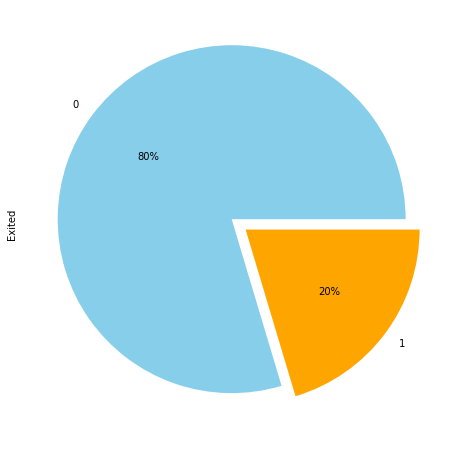

In [6]:
data.Exited.value_counts().plot(kind='pie', autopct='%1.0f%%', colors=['skyblue', 'orange'], explode=(0.05, 0.05))

    The output shows that in our dataset, 20% of the customers left the bank. Here 1 belongs to the case where the customer left the bank, where 0 refers to the scenario where a customer didn't leave the bank.

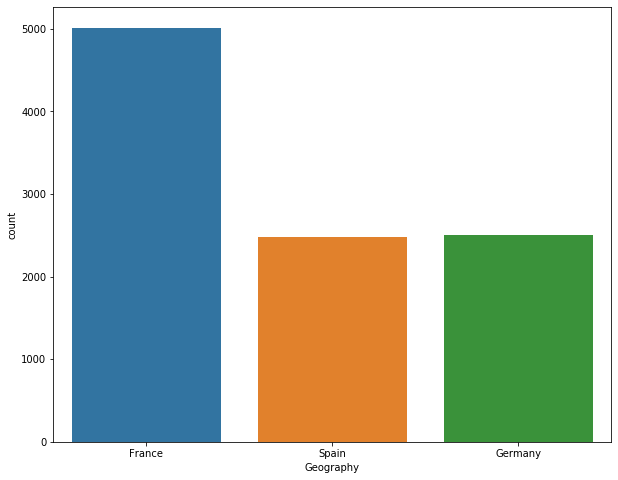

In [7]:
sns.countplot(x='Geography', data=data)

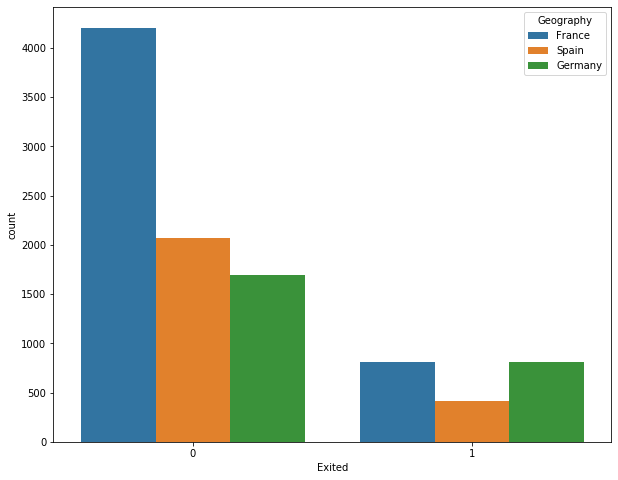

In [8]:
sns.countplot(x='Exited', hue='Geography', data=data)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
RowNumber          10000 non-null int64
CustomerId         10000 non-null int64
Surname            10000 non-null object
CreditScore        10000 non-null int64
Geography          10000 non-null object
Gender             10000 non-null object
Age                10000 non-null int64
Tenure             10000 non-null int64
Balance            10000 non-null float64
NumOfProducts      10000 non-null int64
HasCrCard          10000 non-null int64
IsActiveMember     10000 non-null int64
EstimatedSalary    10000 non-null float64
Exited             10000 non-null int64
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [10]:
categorical_columns = ['Geography', 'Gender', 'HasCrCard', 'IsActiveMember']

In [11]:
numerical_columns = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

In [12]:
outputs = ['Exited']

In [13]:
for category in categorical_columns:
    data[category] = data[category].astype('category')

In [14]:
data['Geography'].cat.categories

Index(['France', 'Germany', 'Spain'], dtype='object')

In [15]:
data['Geography'].head().cat.codes

0    0
1    2
2    0
3    0
4    2
dtype: int8

In [16]:
geo = data['Geography'].cat.codes.values

In [17]:
geo

array([0, 2, 0, ..., 0, 1, 0], dtype=int8)

In [18]:
gen = data['Gender'].cat.codes.values
hcc = data['HasCrCard'].cat.codes.values
iam = data['IsActiveMember'].cat.codes.values

In [19]:
categorical_data = np.stack([geo, gen, hcc, iam], 1)

categorical_data[:10]

array([[0, 0, 1, 1],
       [2, 0, 0, 1],
       [0, 0, 1, 0],
       [0, 0, 0, 0],
       [2, 0, 1, 1],
       [2, 1, 1, 0],
       [0, 1, 1, 1],
       [1, 0, 1, 0],
       [0, 1, 0, 1],
       [0, 1, 1, 1]], dtype=int8)

In [20]:
## Now to create a tensor from the aforementioned numpy array, you can simply pass the array to the tensor 
##class of the torch module. Remember, for the categorical columns the data type should be torch.int64.

categorical_data = torch.tensor(categorical_data, dtype=torch.int64)
categorical_data[:10]

tensor([[0, 0, 1, 1],
        [2, 0, 0, 1],
        [0, 0, 1, 0],
        [0, 0, 0, 0],
        [2, 0, 1, 1],
        [2, 1, 1, 0],
        [0, 1, 1, 1],
        [1, 0, 1, 0],
        [0, 1, 0, 1],
        [0, 1, 1, 1]])

      In the output, you can see that the numpy array of categorical data has now been converted into a tensor object.

In [21]:
numerical_data = np.stack([data[col].values for col in numerical_columns], 1)
numerical_data = torch.tensor(numerical_data, dtype=torch.float)
numerical_data[:5]

tensor([[6.1900e+02, 4.2000e+01, 2.0000e+00, 0.0000e+00, 1.0000e+00, 1.0135e+05],
        [6.0800e+02, 4.1000e+01, 1.0000e+00, 8.3808e+04, 1.0000e+00, 1.1254e+05],
        [5.0200e+02, 4.2000e+01, 8.0000e+00, 1.5966e+05, 3.0000e+00, 1.1393e+05],
        [6.9900e+02, 3.9000e+01, 1.0000e+00, 0.0000e+00, 2.0000e+00, 9.3827e+04],
        [8.5000e+02, 4.3000e+01, 2.0000e+00, 1.2551e+05, 1.0000e+00, 7.9084e+04]])

In [22]:
outputs = torch.tensor(data[outputs].values).flatten()
outputs[:5]

tensor([1, 0, 1, 0, 0])

In [23]:
print(categorical_data.shape)
print(numerical_data.shape)
print(outputs.shape)

torch.Size([10000, 4])
torch.Size([10000, 6])
torch.Size([10000])


In [24]:
categorical_column_sizes = [len(data[column].cat.categories) for column in categorical_columns]
categorical_embedding_sizes = [(col_size, min(50, (col_size+1)//2)) for col_size in categorical_column_sizes]
print(categorical_embedding_sizes)

[(3, 2), (2, 1), (2, 1), (2, 1)]


In [25]:
total_records = 10000
test_records = int(total_records * .2)

categorical_train_data = categorical_data[:total_records-test_records]
categorical_test_data = categorical_data[total_records-test_records:total_records]
numerical_train_data = numerical_data[:total_records-test_records]
numerical_test_data = numerical_data[total_records-test_records:total_records]
train_outputs = outputs[:total_records-test_records]
test_outputs = outputs[total_records-test_records:total_records]

In [26]:
print(len(categorical_train_data))
print(len(numerical_train_data))
print(len(train_outputs))

print(len(categorical_test_data))
print(len(numerical_test_data))
print(len(test_outputs))

8000
8000
8000
2000
2000
2000


In [27]:
class Model(nn.Module):

    def __init__(self, embedding_size, num_numerical_cols, output_size, layers, p=0.4):
        
        super().__init__()
        self.all_embeddings = nn.ModuleList([nn.Embedding(ni, nf) for ni, nf in embedding_size])
        self.embedding_dropout = nn.Dropout(p)
        self.batch_norm_num = nn.BatchNorm1d(num_numerical_cols)

        all_layers = []
        num_categorical_cols = sum((nf for ni, nf in embedding_size))
        input_size = num_categorical_cols + num_numerical_cols

        for i in layers:
            all_layers.append(nn.Linear(input_size, i))
            all_layers.append(nn.ReLU(inplace=True))
            all_layers.append(nn.BatchNorm1d(i))
            all_layers.append(nn.Dropout(p))
            input_size = i

        all_layers.append(nn.Linear(layers[-1], output_size))

        self.layers = nn.Sequential(*all_layers)

    def forward(self, x_categorical, x_numerical):
        
        embeddings = []
        for i,e in enumerate(self.all_embeddings):
            embeddings.append(e(x_categorical[:,i]))
        x = torch.cat(embeddings, 1)
        x = self.embedding_dropout(x)

        x_numerical = self.batch_norm_num(x_numerical)
        x = torch.cat([x, x_numerical], 1)
        x = self.layers(x)
        return x



    In the first line, we declare a Model class that inherits from the Module class from PyTorch's nn module. In the constructor of the class (the __init__() method) the following parameters are passed:

            embedding_size: Contains the embedding size for the categorical columns
            
            num_numerical_cols: Stores the total number of numerical columns

            output_size: The size of the output layer or the number of possible outputs.

            layers: List which contains number of neurons for all the layers.

            p: Dropout with the default value of 0.5

`Linear: Used to calculate the dot product between the inputs and weight matrixes` <br>

`ReLu: Which is applied as an activation function` <br>

`BatchNorm1d: Used to apply batch normalization to the numerical columns`<br>

`Dropout: Used to avoid overfitting`

In [28]:
model = Model(categorical_embedding_sizes, numerical_data.shape[1], 2, [200,100,50], p=0.4)

    You can see that we pass the embedding size of the categorical columns, the number of numerical columns, the output size (2 in our case) and the neurons in the hidden layers. You can see that we have three hidden layers with 200, 100, and 50 neurons, respectively. You can choose any other size if you want.

In [29]:
categorical_embedding_sizes

[(3, 2), (2, 1), (2, 1), (2, 1)]

In [30]:
numerical_data.shape[1]

6

In [31]:
print(model)

Model(
  (all_embeddings): ModuleList(
    (0): Embedding(3, 2)
    (1): Embedding(2, 1)
    (2): Embedding(2, 1)
    (3): Embedding(2, 1)
  )
  (embedding_dropout): Dropout(p=0.4)
  (batch_norm_num): BatchNorm1d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (layers): Sequential(
    (0): Linear(in_features=11, out_features=200, bias=True)
    (1): ReLU(inplace)
    (2): BatchNorm1d(200, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (3): Dropout(p=0.4)
    (4): Linear(in_features=200, out_features=100, bias=True)
    (5): ReLU(inplace)
    (6): BatchNorm1d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (7): Dropout(p=0.4)
    (8): Linear(in_features=100, out_features=50, bias=True)
    (9): ReLU(inplace)
    (10): BatchNorm1d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (11): Dropout(p=0.4)
    (12): Linear(in_features=50, out_features=2, bias=True)
  )
)


    You can see that in the first linear layer the value of the in_features variable is 11 since we have 6 numerical columns and the sum of embedding dimensions for the categorical columns is 5, hence 6+5 = 11. Similarly, in the last layer, the out_features has a value of 2 since we have only 2 possible outputs.

In [32]:
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [ ]:
epochs = 300
aggregated_losses = []

for i in range(epochs):
    i += 1
    y_pred = model(categorical_train_data, numerical_train_data)
    single_loss = loss_function(y_pred, train_outputs)
    aggregated_losses.append(single_loss)

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    optimizer.zero_grad()
    single_loss.backward()
    optimizer.step()

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

In [40]:
plt.plot(range(epochs), aggregated_losses)
plt.ylabel('Loss')
plt.xlabel('epoch');

NameError: name 'epochs' is not defined

In [41]:
with torch.no_grad():
    y_val = model(categorical_test_data, numerical_test_data)
    loss = loss_function(y_val, test_outputs)
print(f'Loss: {loss:.8f}')

Loss: 0.72291344


In [42]:
print(y_val[:5])

tensor([[ 0.5851, -0.5534],
        [-0.0825, -0.2207],
        [ 0.1331,  0.1042],
        [ 0.1204,  0.0416],
        [ 0.4895,  0.0711]])


In [43]:
y_val = np.argmax(y_val, axis=1)

In [44]:
print(y_val[:5])

tensor([0, 0, 0, 0, 0])


In [45]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(test_outputs,y_val))
print(classification_report(test_outputs,y_val))
print(accuracy_score(test_outputs, y_val))

[[896 714]
 [219 171]]
              precision    recall  f1-score   support

           0       0.80      0.56      0.66      1610
           1       0.19      0.44      0.27       390

    accuracy                           0.53      2000
   macro avg       0.50      0.50      0.46      2000
weighted avg       0.68      0.53      0.58      2000

0.5335
